# 의사 결정 트리

## 의사 결정 트리란?
의사 결정 트리는 정보 이득 수치를 계산해서 최적 목표를 달성하는 트리를 완성한다.  

$$Entropy(A) = -\sum_{k=1}^{n}{p_k log_2 (p_k)}$$
$$p_k = \frac{샘플 안에 속한 k의 개 수}{샘플수}$$

의사 결정 트리의 분기는 정보 이득을 이용하여 진행하는데,  
이전의 정보 보다 얼마나 정보적으로 가치가 있는지를 판단하여 더 큰쪽으로 가지를 분기한다.  
하지만, 정보 이득의 임계점을 정하지 않고 큰 정보 이득이 있는 쪽으로 가지를 분기하게 되면  
과적합 문제가 발생하기 때문에 특정 임계점 이상의 정보 이득을 얻었을 때만 분기할 수 있도록 지정해야 한다.  
이러한 과정을 가지치기 또는 프루닝이라고 한다.  

## 의사 결정 트리 해석 방법


1. **의사 결정 트리 시각화**  
노드와 간선을 이용해 시각화 하는 방법으로, 의사 결정에 중요한 변수를 노드 안에 넣고 이를 기준으로 이진 분류하여 가지를 생성해 나간다. 


2. **피처 중요도**  
데이터의 피처가 알고리즘의 정확한 분류에 얼마나 큰 영향을 미치는지 분석하는 기법  


3. **부분 의존성 플롯(PDP)**  
피처의 수치를 선형적으로 변형하면서 알고리즘 해석 능력이 얼마나 증가하고 감소하는지를 관찰하는 방식  

### 데이터 설명
실습에 사용할 데이터는 `피마 인디언 당뇨병 진단`으로, 세계에서 당뇨병 발병 비율이 가장 높은 애리조나 주의 피마 인디언을 대상으로 조사한 자료다.  

데이터의 features은 다음과 같다.
- `Pregnancies` : 임신횟수
- `Glucose` : 포도당 부하 검사 수치
- `BloodPressure` : 혈압
- `SkinThickness` : 팔 삼두근 뒤쪽의 피하지방 측정값
- `Insulin` : 혈청 인슐린
- `BMI` : 체질량 지수
- `DiabetesPedigreeFunction` : 당뇨 내력 가중치 값
- `Age` : 나이

8개의 features에 대한 결과가 이진 분류로 주어진다. 
- 당뇨여부(당뇨병 아님 : 0, 당뇨병 : 1)

### 의사 결정 트리 시각화

In [ ]:
import numpy as np
from numpy import loadtxt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import pandas as pd

In [ ]:
!wget https://gist.githubusercontent.com/ktisha/c21e73a1bd1700294ef790c56c8aec1f/raw/819b69b5736821ccee93d05b51de0510bea00294/pima-indians-diabetes.csv

--2021-01-22 09:54:24--  https://gist.githubusercontent.com/ktisha/c21e73a1bd1700294ef790c56c8aec1f/raw/819b69b5736821ccee93d05b51de0510bea00294/pima-indians-diabetes.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23628 (23K) [text/plain]
Saving to: ‘pima-indians-diabetes.csv.1’

pima-indians-diabet 100%[===================>]  23.07K  --.-KB/s    in 0s      

2021-01-22 09:54:24 (63.3 MB/s) - ‘pima-indians-diabetes.csv.1’ saved [23628/23628]



In [ ]:
dataset = loadtxt("pima-indians-diabetes.csv", delimiter=',')

In [ ]:
X = dataset[:, 0:8]
y = dataset[:, -1]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [ ]:
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
            'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [ ]:
model = XGBClassifier(feature_names=features)
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1,
              feature_names=['Pregnancies', 'Glucose', 'BloodPressure',
                             'SkinThickness', 'Insulin', 'BMI',
                             'DiabetesPedigreeFunction', 'Age'],
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]

In [ ]:
accuracy = accuracy_score(y_test, predictions)
print('Accuracy: %.2f%%' % (accuracy * 100))

Accuracy: 81.17%


In [ ]:
value = [1, 161, 72, 35, 0, 28.1, 0.527, 20]

In [ ]:
l = model.predict_proba(value)
print("No diabetes: {:.2%}\nYes diabetes: {:.2%}".format(l[0][0], l[0][1]))

No diabetes: 69.09%
Yes diabetes: 30.91%


In [ ]:
f = open('feature_map.txt', 'w')

for i in range(len(features)):
    f.write(str(i) + "\t" + features[i] + '\t' + "q\n")
f.close()

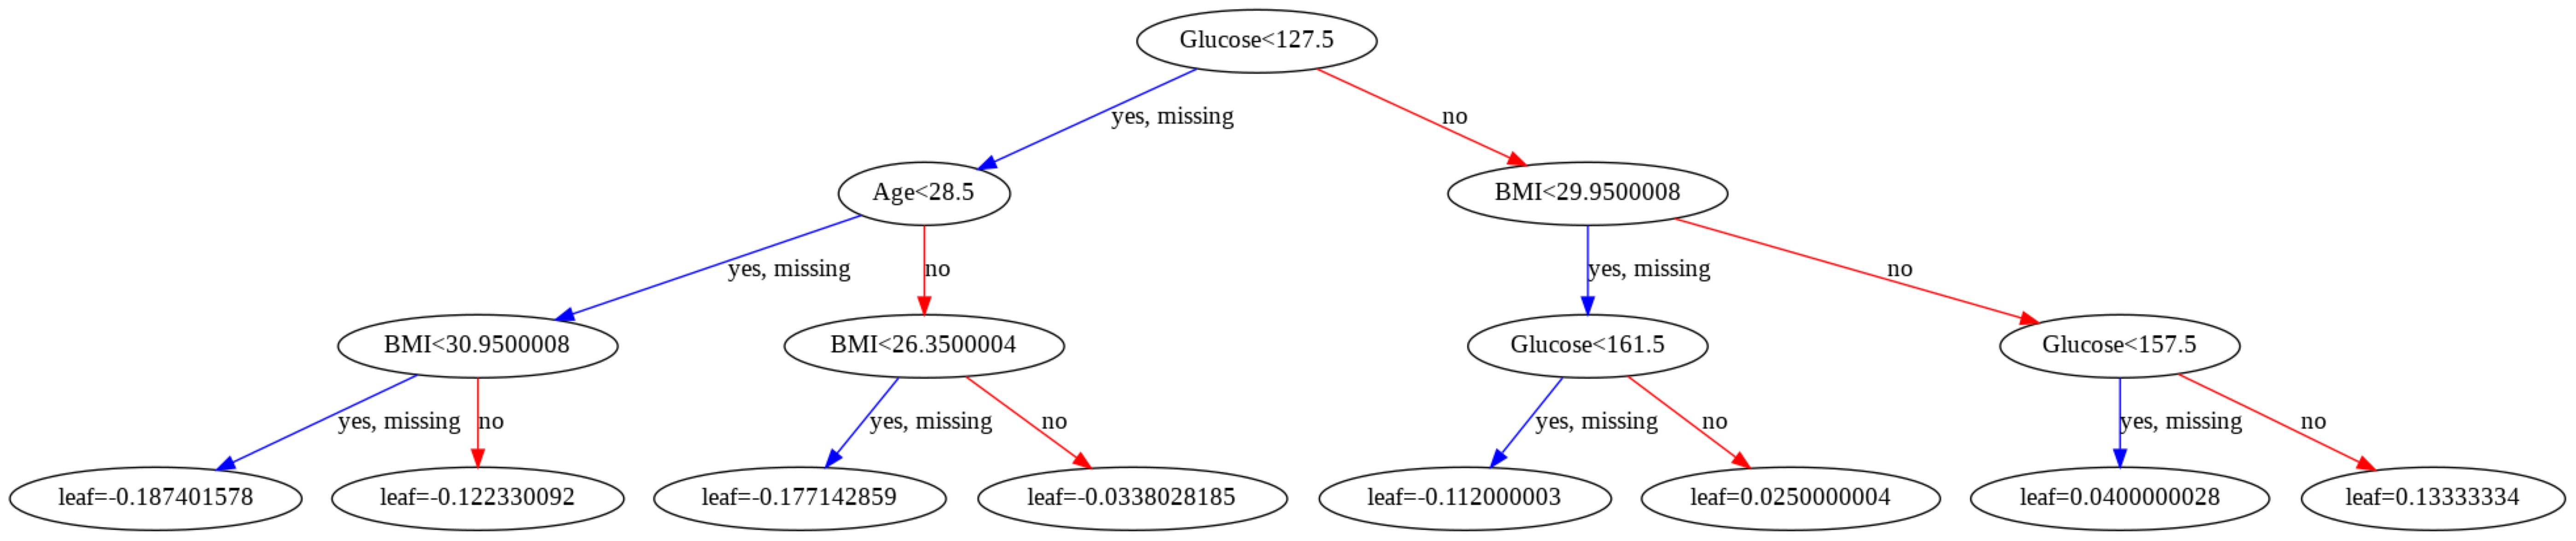

In [ ]:
from xgboost import plot_tree
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 100, 200

plot_tree(model, fmap='feature_map.txt')

루트 노드에서 `glucose`가 127.5 보다 작거나 값이 없을 땐 왼쪽으로 분기하고 그보다 클 때는 오른쪽으로 분기를 한다.  

우리가 임의로 넣은 데이터의 경우 어떻게 분기되는지 알아보자  

`Glucose`가 161 이므로 루트 노드에서 오른쪽 노드로 향하고  
`BMI`의 경우 29.95의 값보다 작으므로 왼쪽 노드로 향한다.  
그리고 `Glucose`가 161.5 보다 작으므로 왼쪽 노드로 향해 마지막 노드에 도착하게 된다.  
마지막 노드의 값은 -0.112000003의 값을 출력했는데 이를 식에 넣어 계산을 하면  
$$p(x) = \frac{1}{1+e^{-leafvalue}}$$


In [ ]:
1 / (1 + np.exp(0.112000003)) * 100

47.202923191677364

약 47.20%의 값으로 50%를 기준으로 했을 때 `Outcome=0`의 값을 가지고  
이는 당뇨병이 없다 라고 결론 내릴 수 있다.  

In [ ]:
model = XGBClassifier(max_depth=2)

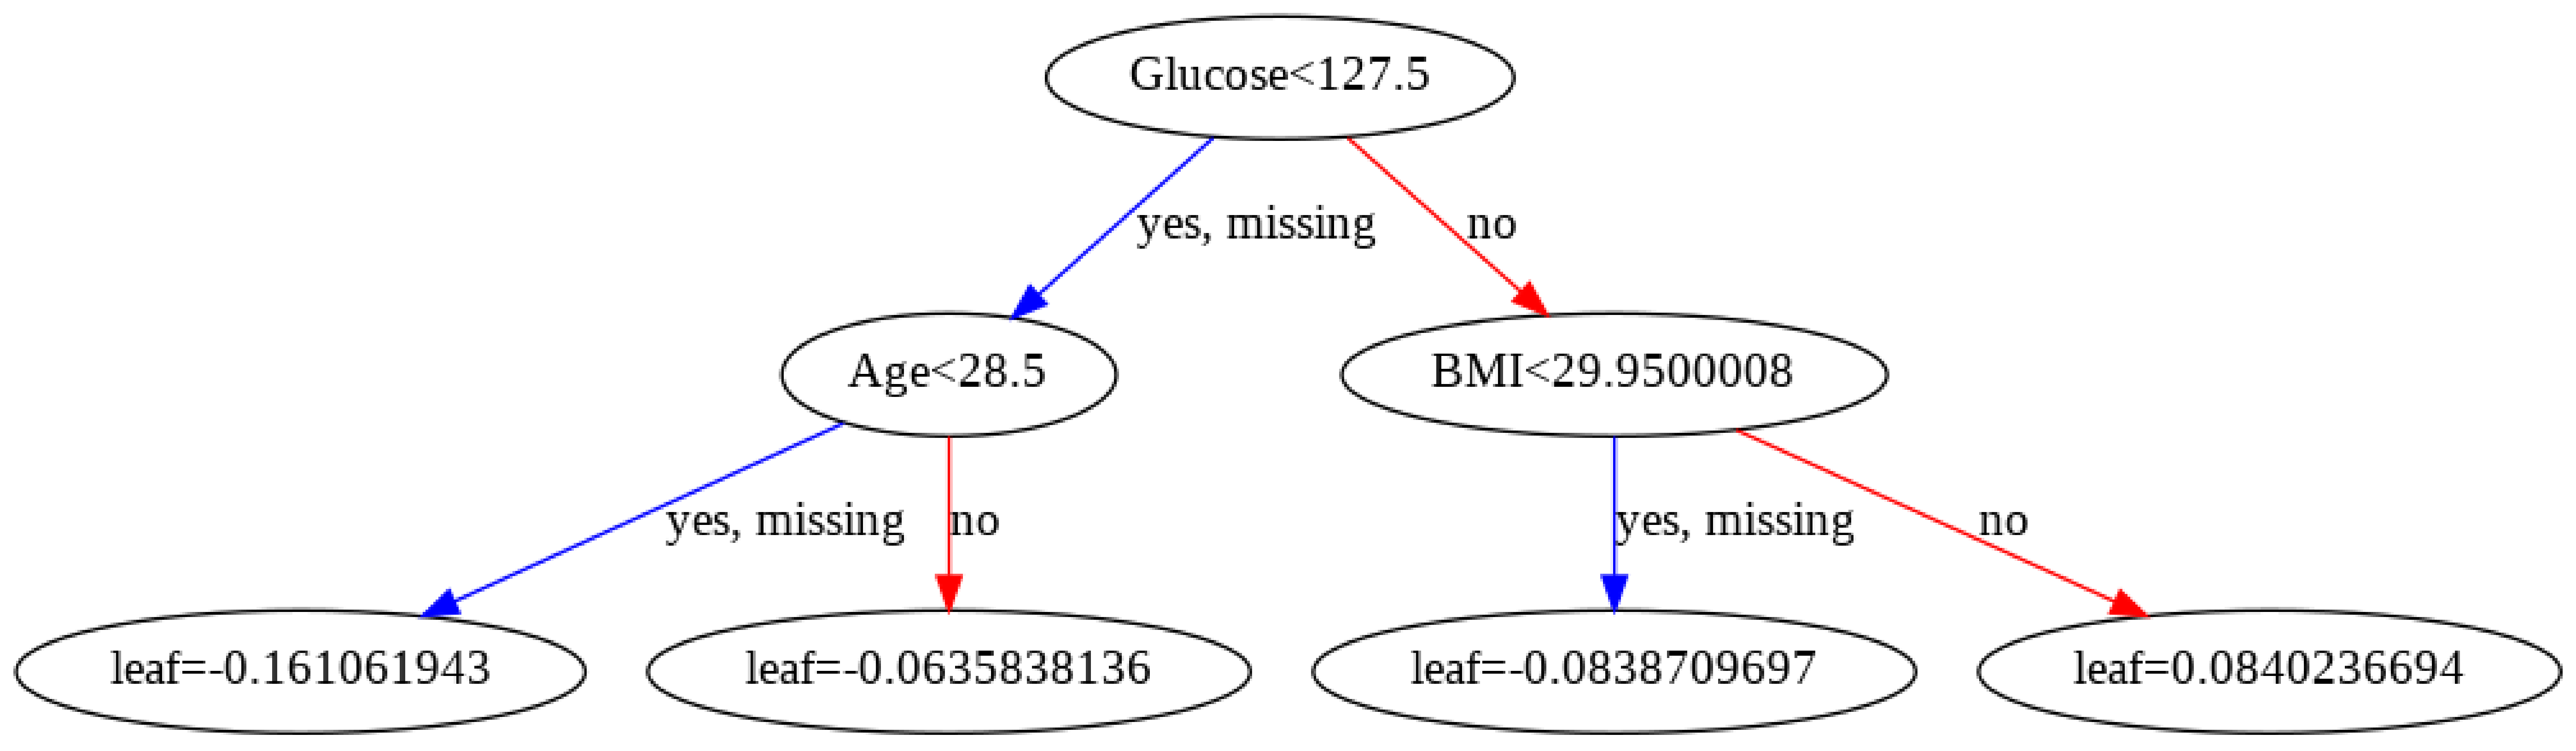

In [ ]:
model.fit(x_train, y_train)

plot_tree(model, fmap='feature_map.txt')

기존의 모델에서 max_depth를 적게 설정해 적은 가지로 모형을 표현할 수 있다.  
`default=3`

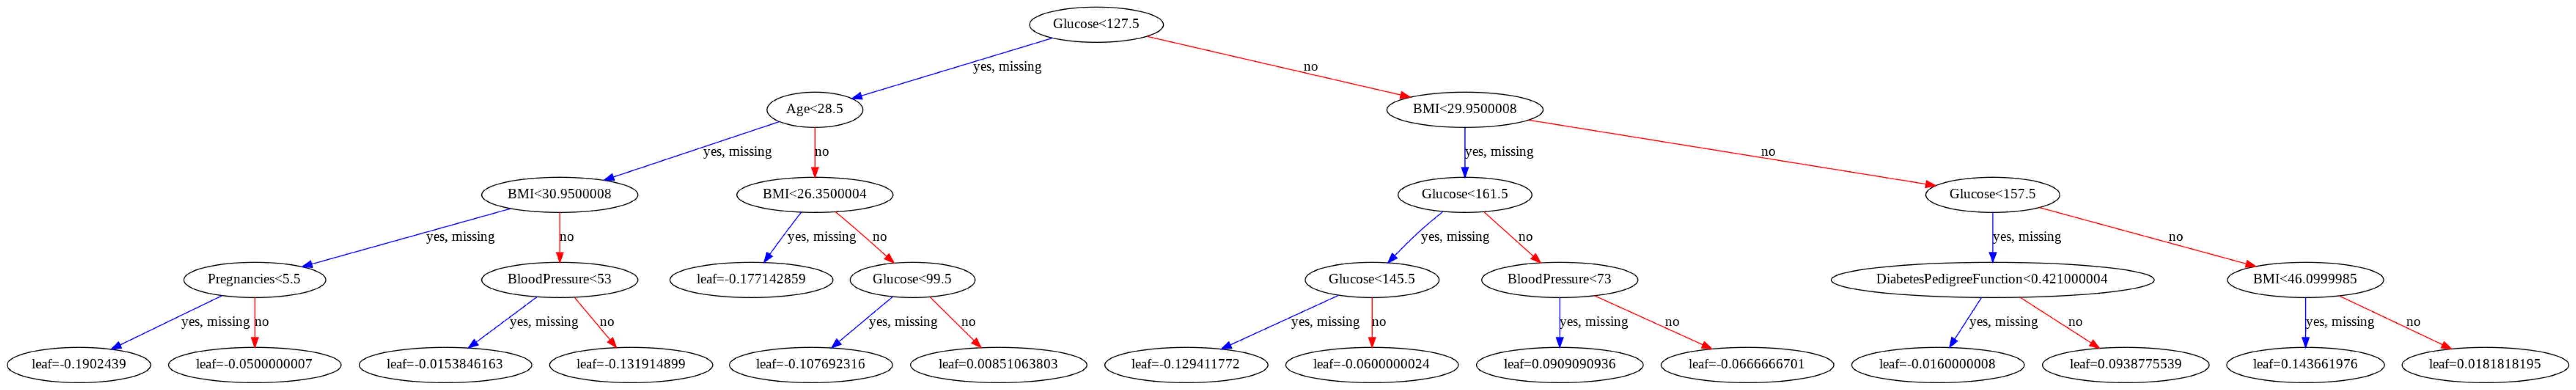

In [ ]:
model = XGBClassifier(max_depth=4)
model.fit(x_train, y_train)

plot_tree(model, fmap='feature_map.txt')

### 피처 중요도

피쳐 중요도(FI)는 특정 피처마다 한 번씩 순회하면서 모델을 만들고 에러를 측정하여 조정한다. 이때 피처들은 서로에게 상호 의존도가 약해야 한다. 상호 의존도가 높게 되면 피처 중요도가 정확하게 계산되지 않을 수 있다.  

In [ ]:
model = XGBClassifier()

model.fit(x_train, y_train)

model.get_booster().feature_names = features

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

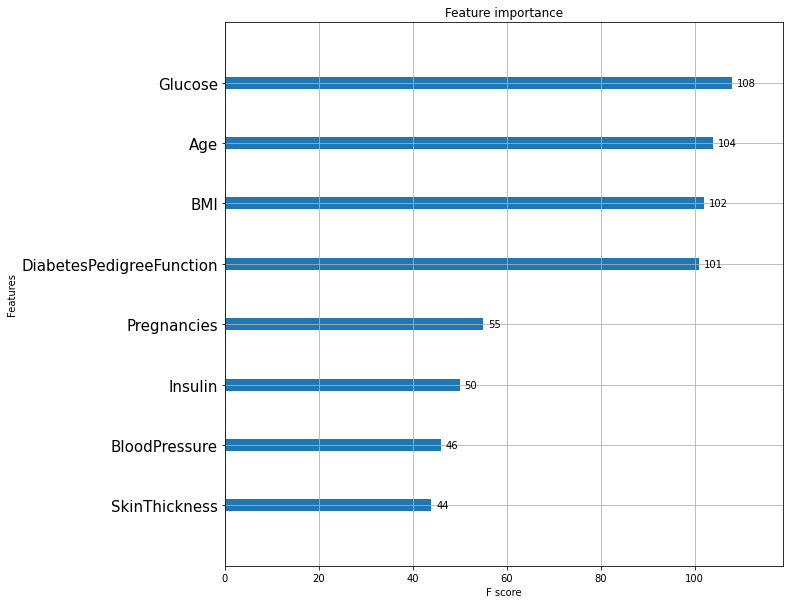

In [ ]:
from xgboost import plot_importance

rcParams['figure.figsize'] = 10, 10

plot_importance(model)
plt.yticks(fontsize=15)

깊이가 3인 모델에서는 `Glucose`가 가장 중요한 변수로 꼽혔다.

In [ ]:
model = XGBClassifier(max_depth=4)

model.fit(x_train, y_train)

model.get_booster().feature_names = features

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

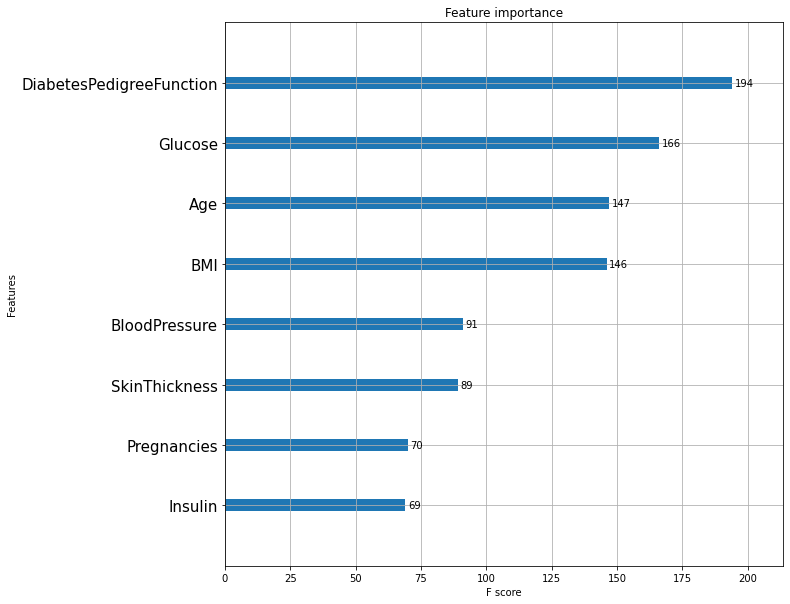

In [ ]:
plot_importance(model)
plt.yticks(fontsize=15)

깊이가 4인 모델에서는 `DiabetesPedigreeFunction`이 가장 중요한 변수로 꼽혔다. 이렇게 피처 중요도가 변하는 이유는 트리의 깊이에 따라 모델의 의사 결정 방식과 정확도가 함께 변화하기 때문이다. 즉, 그래프의 순서가 당뇨병을 진단하는 우선순위라고 판단할 수 없다.

### 부분 의존성 플롯

In [ ]:
!pip install pdpbox

In [ ]:
from pdpbox import info_plots
from pdpbox import pdp as pdp
import pandas as pd

cols = features + ['Outcome']
pima_data = pd.DataFrame(dataset, columns=cols)
pima_features = pima_data.columns[:8]
pima_target = pima_data.columns[8]

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


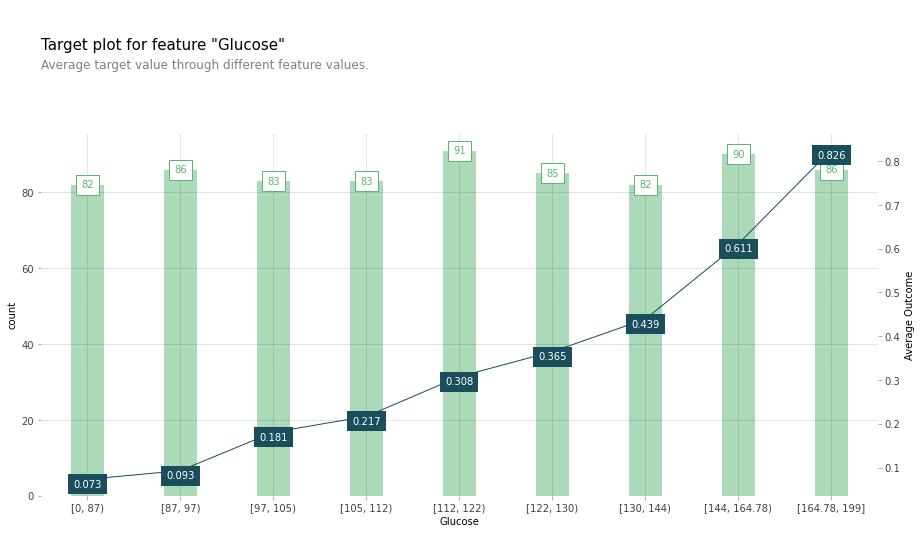

In [ ]:
fig, axes, summary_df = info_plots.target_plot(
    df=pima_data,
    feature='Glucose',
    feature_name='Glucose',
    target=pima_target
)

그래프에 대해서 설명을 하자면  
x축은 `Glucose`의 수치, 왼쪽 y축은 각 구간별 관측치의 개수, 오른쪽 y축은 당뇨병 진단 여부이다.  
막대 그래프는 왼쪽 y축에 대응하며, 꺾은선 그래프는 오른쪽 y축에 대응한다.  

위의 그래프를 해석해보면  
`Glucose` 수치가 100인 환자가 존재한다고 할 때, 이 환자는 왼쪽에서 세번째 그룹에 속하며 당뇨병이 발생할 확률은 18.1%이다.  

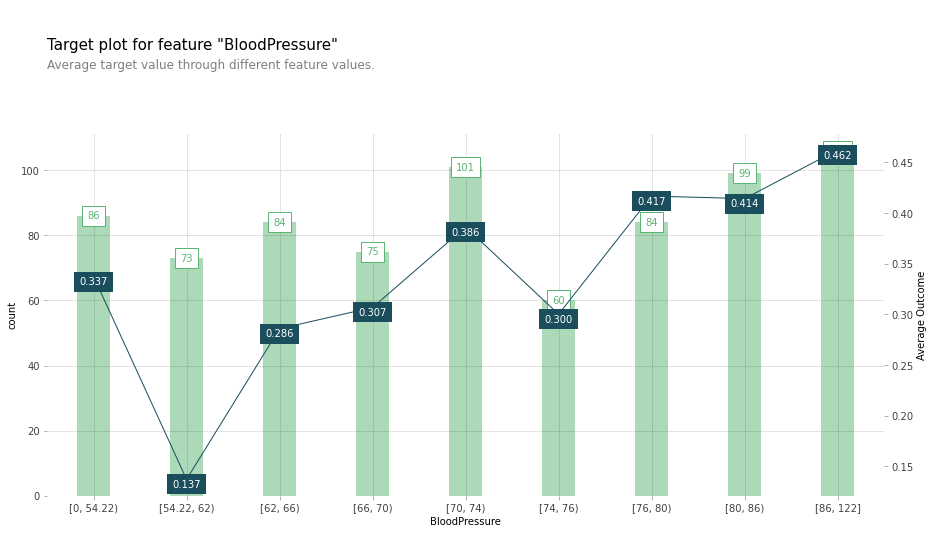

In [ ]:
fig, axes, summary_df = info_plots.target_plot(
    df=pima_data,
    feature='BloodPressure',
    feature_name='BloodPressure',
    target=pima_target
)

`BloodPressure`은 이완기 혈압을 잰 수치로 60 이상 80 미만일 때 정상 혈압이며 그 이상은 고혈압 전단계 ~ 고혈압 위기에 속하며, 이하는 저혈압에 속한다.  
정상 혈압의 수준에선 당뇨병 확률이 30% 대에서 머물러있지만, 그 이상은 40% 대로 증가한다.   
하지만 50% 이상일 때 당뇨병이라고 진단 내릴 수 있으므로 `BloodPressure` 만으로 당뇨병을 진단하기엔 어렵다.   

아래의 표는 그래프의 값들을 DataFrame 형식으로 반환한 값이다.

In [ ]:
summary_df

,x,display_column,value_lower,value_upper,count,Outcome
0,0,"[0, 54.22)",0.000000,54.222222,86,0.337209
1,1,"[54.22, 62)",54.222222,62.000000,73,0.136986
2,2,"[62, 66)",62.000000,66.000000,84,0.285714
3,3,"[66, 70)",66.000000,70.000000,75,0.306667
4,4,"[70, 74)",70.000000,74.000000,101,0.386139
5,5,"[74, 76)",74.000000,76.000000,60,0.300000
6,6,"[76, 80)",76.000000,80.000000,84,0.416667
7,7,"[80, 86)",80.000000,86.000000,99,0.414141
8,8,"[86, 122]",86.000000,122.000000,106,0.462264


다음은 우리가 학습한 모델을 넣어 값을 예측하는 모델을 써보려고한다. 이는 모델이 학습 데이터의 빈도와 비슷한 추이로 당뇨병을 진단하는지를 예측한다.

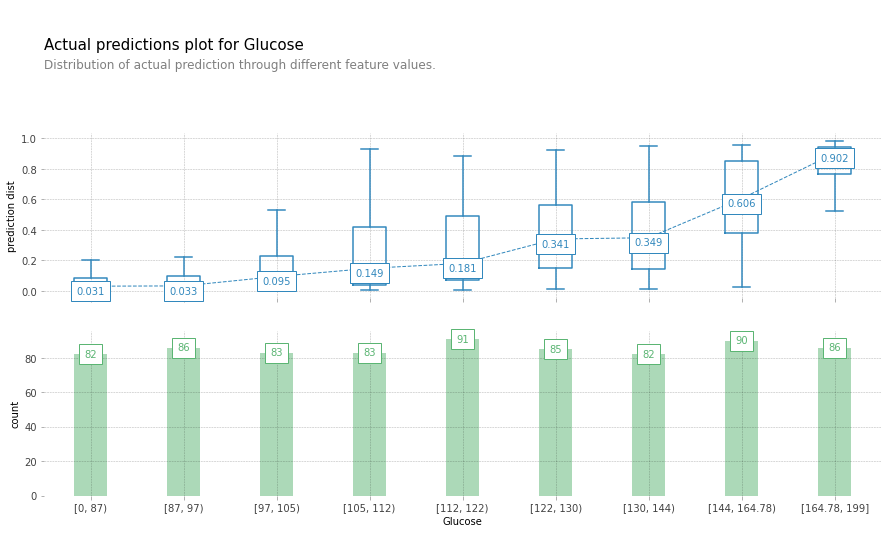

In [ ]:
fig, axes, summary_df = info_plots.actual_plot(
    model=model,
    X = pima_data[pima_features],
    feature='Glucose',
    feature_name='Glucose',
    predict_kwds={}
)

아래의 막대 그래프의 경우 위의 `Glucose`의 빈도수와 동일하다. 즉, 학습 데이터의 각 구간별 개수이다. 위의 꺾은선 그래프와 상자 그림은 캔들스틱 차트로, box plot의 축약된 버전으로 위 아래 선은 신뢰구간을 의미한다.  

그럼 `Glucose`의 값이 100일 때라고 가정하고 위의 그림을 해석해보면,  
오른쪽에서 세번째에 속하는 그룹으로 지정이 되고 이 수치를 갖고 있는 환자들은 평균적으로 9.5%가 당뇨병을 앓고 있다고 추정된다. 또한 해당 구간에서 당뇨병이 있으리라 추정하는 최대치는 약 50%~60% 로 모델이 이 이상 당뇨병이 있다고 추정하지 않는다. 이전에 `target_plot`을 사용한 꺾은 선 그래프에서 해당 그룹의 당뇨병 추정 확률은 18.1% 였다. 하지만, 모델을 통한 당뇨병의 추정 확률은 9.5%로 감소하였다. 이는 해당 구간에서 당뇨병을 진단하는데 `Glucose`의 데이터는 음의 상관관계를 가진다고 할 수 있다.

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


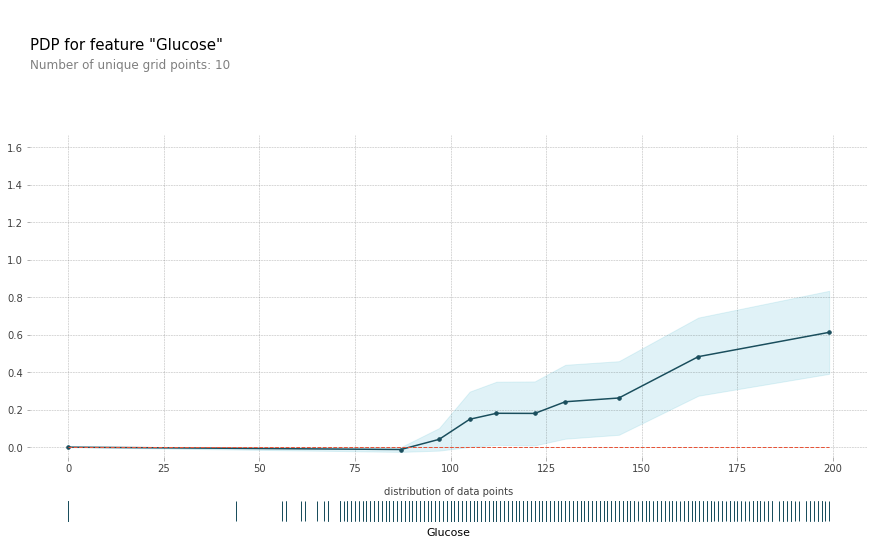

In [ ]:
pdp_gc = pdp.pdp_isolate(
    model=model,
    dataset=pima_data,
    model_features=pima_features,
    feature='Glucose'
)

fig, axes = pdp.pdp_plot(
    pdp_gc,
    'Glucose',
    plot_lines=False,
    frac_to_plot=0.5,
    plot_pts_dist=True
)

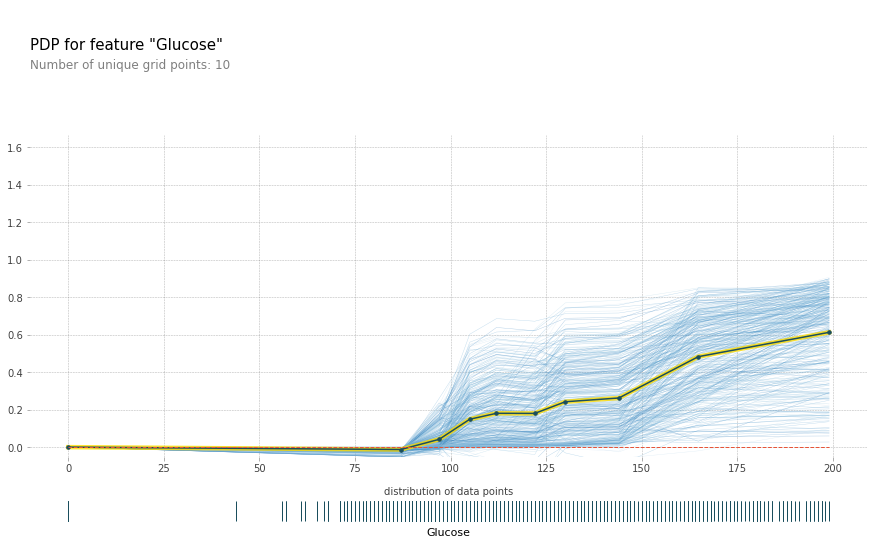

In [ ]:
fig, axes = pdp.pdp_plot(
    pdp_gc,
    'Glucose',
    plot_lines=True,
    frac_to_plot=0.5,
    plot_pts_dist=True
)

첫번째 plot의 경우 전반적인 추세를 보여주고 두번째 plot은 알고리즘 매회에 대응하는 별도의 라인이 표시 된다. 여기서 150에서 175사이의 값에서 급격하게 증가하는 선이 보이지만, 중간의 초록색 선의 경우 증가하긴 하지만 급격하게 변화하진 않는다. 이는 급격하게 증가하는 부분의 계산 결과가 모델에 미치는 영향이 미미했기 때문이다.

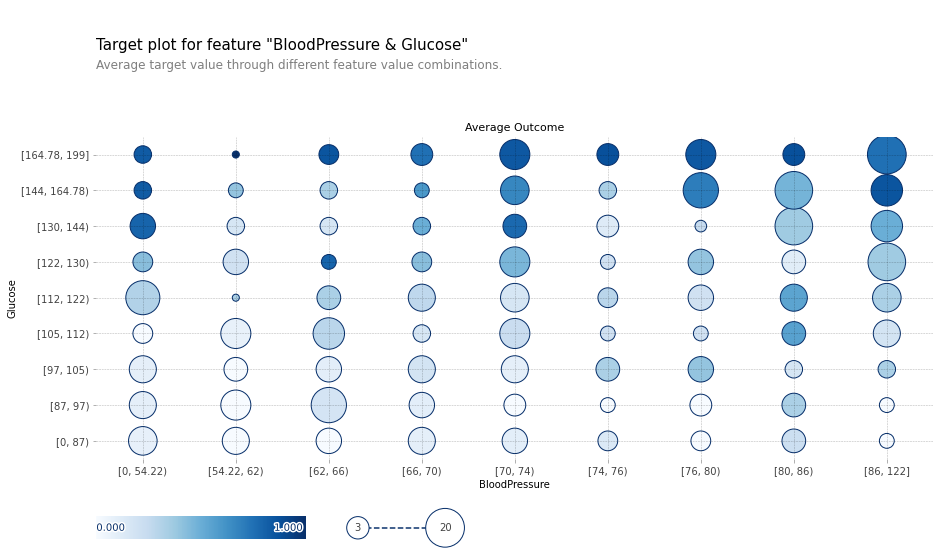

In [ ]:
fig, axes, summary_df = info_plots.target_plot_interact(
    df=pima_data,
    features=['BloodPressure', 'Glucose'],
    feature_names=['BloodPressure', 'Glucose'],
    target=pima_target
)

`target_plot_interact`의 경우 `target_plot`과 유사하게 데이터 전체에 대한 당뇨병 진단 결과를 그리고 피처 간 관계를 표시한다.  
각 셀에 해당하는 원의 크기는 훈련 데이터의 크기이다. 또한, 원의 색깔은 당뇨병 진단 가능성이며 진할수록 당뇨병에 걸릴 가능성이 높다는 의미이다.  

`BloodPressure`이 65이고 `Glucose`가 125인 사람이 있다고 할 때  
이 데이터에 속하는 사람은 적지만, 당뇨병으로 진단될 확률이 높다는 의미이다.


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


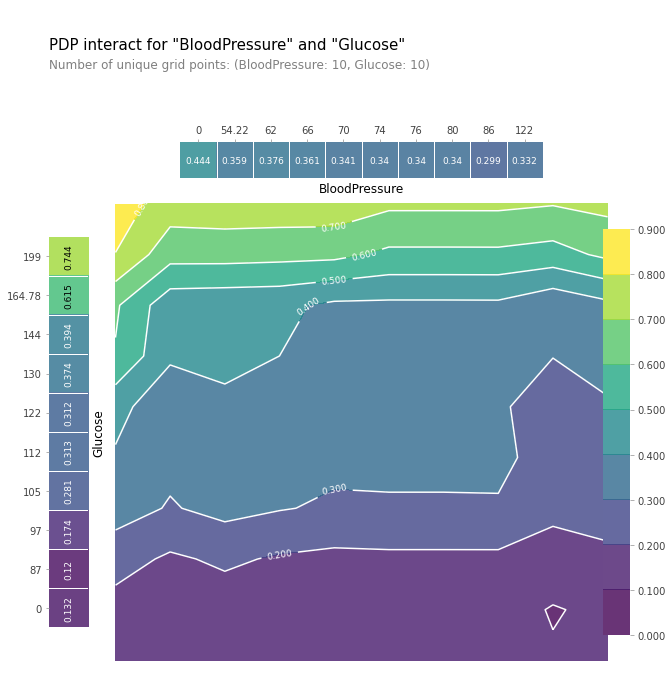

In [ ]:
pdp_interaction = pdp.pdp_interact(
    model=model,
    dataset=pima_data,
    model_features=pima_features,
    features=['BloodPressure', 'Glucose']
)

fig, axes = pdp.pdp_interact_plot(
    pdp_interact_out=pdp_interaction,
    feature_names=['BloodPressure', 'Glucose'],
    plot_type='contour',
    x_quantile=True,
    plot_pdp=True
)

위의 plot은 `Glucose`와 `BloodPressure`의 부분 의존성 계산 결과를 등고선 방식으로 그린 결과이다. 오른쪽에 수치가 커질수록 색이 옅어지는데 이는 당뇨병의 수치를 의미한다. 즉, 색이 옅어질수록 당뇨병 진단 가능성이 올라간다.

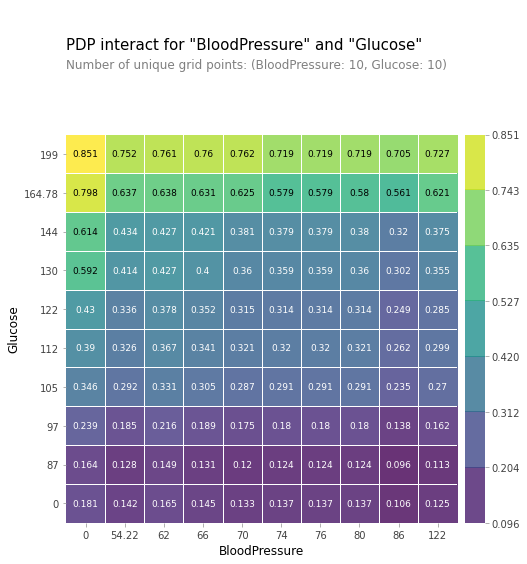

In [ ]:
fig, axes = pdp.pdp_interact_plot(
    pdp_interact_out=pdp_interaction,
    feature_names=['BloodPressure', 'Glucose'],
    plot_type='grid',
    x_quantile=True,
)

위의 plot은 등고선 모양을 격자 모양으로 변형시킨 것이다. 또한, 데이터 중 0의 값을 나타내는 값이 존재하는데 이는 데이터가 관측되지 않았음을 의미한다. 관측되지 않은 데이터를 제외하고자 하면 첫번째 열과 마지막 열을 제외 해야 한다.

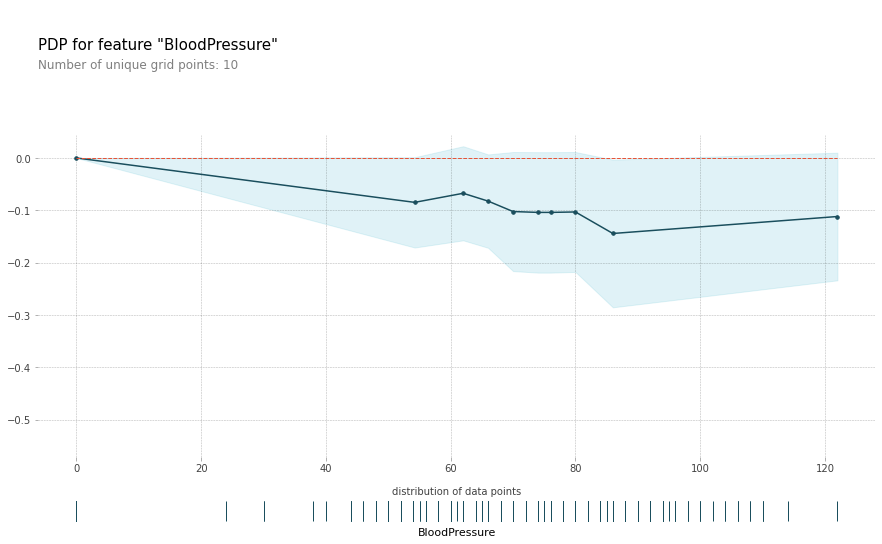

In [ ]:
pdp_bp = pdp.pdp_isolate(
    model=model,
    dataset=pima_data,
    model_features=pima_features,
    feature='BloodPressure'
)

fig, axes = pdp.pdp_plot(
    pdp_bp,
    'BloodPressure',
    plot_lines=False,
    frac_to_plot=0.5,
    plot_pts_dist=True
)

현 그래프는 `BloodPressure`의 값이 증가함에 따라 당뇨병 진단 가능성의 대한 영향력에 대해 설명하고 있다. 위의 `Glucose`와 `BloodPressure`이 같이 있을 때는 값이 증가하면 당뇨병 진단 가능성도 높아지는 듯 보였다. 또한, target 값과의 비교를 통해선 저혈압 부분을 제외하곤 당뇨병 진단 가능성이 증가하는 모습을 보였다. 하지만, 위의 그래프에선 `BloodPressure`이 증가하면 당뇨병을 진단하는데 음의 방향으로 영향을 끼치고 있다. 그렇다면 어떤 해석이 옳은 해석이라고 할 수 있을까?

### 해석 결과가 상충한다면 무엇이 옳은 해석일까?
결론은 두 가지 모두 옳은 해석이다. 하지만, 해석의 방향성을 조금 달리해야한다. 위의 target 값에 대해 `BloodPressure`의 값이 높아지면 당뇨병 진단 가능성에 대해 높은 확률로 영향을 미치지만, 그 값이 음의 방향으로 영향을 미친다고 해석하면 된다. 피처 중요도의 경우 각 feature가 얼만큼 영향을 미치는 영향력을 절대값으로 표현한 값이다.  

## 모델 튜닝하기
앞서 사용한 모델은 기본 파라미터만 사용하여 적합했을 뿐 최적의 값이라고 말할 수 없다. 최적의 값을 찾기위해선 모델의 파라미터를 바꿔가며 좋은 모델인지 아닌지를 판단해야만 한다.

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

In [ ]:
cv_params = {
    'max_depth':np.arange(1, 6, 1)
}

fix_params = {
    'booster':'gbtree',
    'objective':'binary:logistic',
}

csv = GridSearchCV(
    XGBClassifier(**fix_params),
    cv_params,
    scoring='precision',
    cv=5,
    n_jobs=5,
)

csv.fit(x_train, y_train)
print(csv.best_params_)

{'max_depth': 1}


`cv_params`에는 조사하고 싶은 모든 모델 파라미터를 
```
{키(파라미터 이름) : 벨류(리스트 형태의 실험하고 싶은 모든 파라미터)}
```  

형태로 넣어준다.

**GridSearchCV**
- 모델 클래스
- 그리드를 만들어 탐색할 모든 파라미터
- cv(Cross Validation) : K-Fold Cross Validation
- n_jobs : 몇개의 CPU를 사용할 것인가?
- scoring : 모델 평가 방식

In [ ]:
y_pred = csv.predict(x_test)
predictions = [round(value) for value in y_pred]

In [ ]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%"%(accuracy * 100))

Accuracy: 77.92%


In [ ]:
cv_params = {
    'max_depth':np.arange(1, 6, 1),
    'learning_rate':np.arange(0.05, 0.6, 0.05),
    'n_estimators':np.arange(50, 300, 50)
}

fix_params = {
    'booster':'gbtree',
    'objective':'binary:logistic'
}

In [ ]:
csv = GridSearchCV(
    XGBClassifier(**fix_params),
    cv_params,
    scoring='precision',
    cv=5,
    n_jobs=-1
)

csv.fit(x_train, y_train)
print(csv.best_params_)

{'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 50}


깊이가 1인 의사결정 나무가 가장 좋은 성능을 나타낸다고 나왔다.

In [ ]:
y_pred = csv.predict(x_test)
predictions = [round(value) for value in y_pred]

In [ ]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%"%(accuracy * 100))

Accuracy: 75.97%


하지만, 처음에 적합한 모형보다 더 낮은 정확도를 보였고 하나의 깊이를 이용해서 모델을 적합하는 것은 우리가 원하는 결과가 아니다.

In [ ]:
for parameter in csv.cv_results_['params']:
    print(parameter)

{'learning_rate': 0.05, 'max_depth': 1, 'n_estimators': 50}
{'learning_rate': 0.05, 'max_depth': 1, 'n_estimators': 100}
{'learning_rate': 0.05, 'max_depth': 1, 'n_estimators': 150}
{'learning_rate': 0.05, 'max_depth': 1, 'n_estimators': 200}
{'learning_rate': 0.05, 'max_depth': 1, 'n_estimators': 250}
{'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 50}
{'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 100}
{'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 150}
{'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 200}
{'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 250}
{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 50}
{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 150}
{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}
{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 250}
{'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 50}
{'learning_rate': 0.05, 'max

In [ ]:
model = XGBClassifier(
    booster='gbtree',
    objective='binary:logistic',
    learning_rate=0.03,
    n_estimators=150,
    reg_alpha=0.15,
    reg_lambda=0.7,
    max_depth=4
)

In [ ]:
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.03, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=150, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0.15, reg_lambda=0.7, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]

In [ ]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%"%(accuracy * 100))

Accuracy: 84.42%


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[88  9]
 [15 42]]


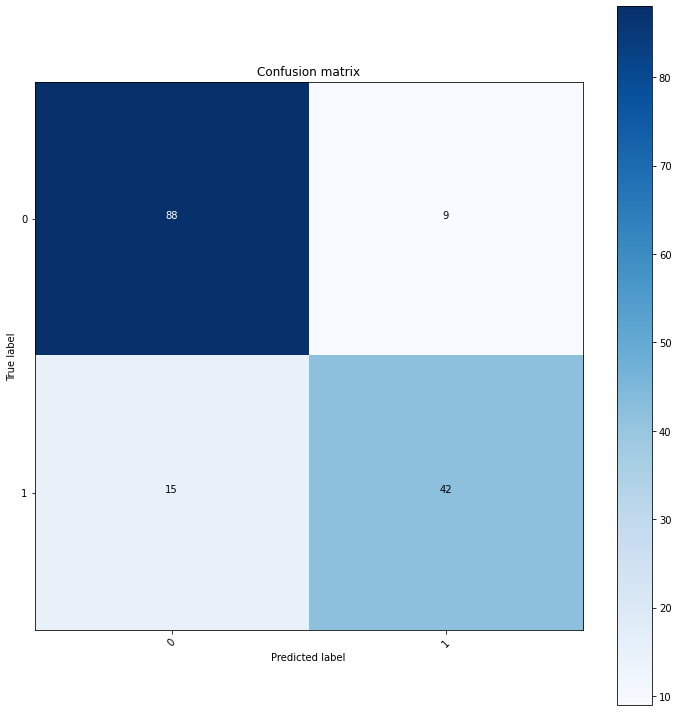

Precision = 0.824
Recall (TPR) = 0.737
Fallout (FPR) = 9.278e-02


(0.8235294117647058, 0.7368421052631579, 0.09278350515463918)

In [ ]:
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(
            j, i, cm[i, j],
            horizontalalignment='center',
            color='white' if cm[i, j] > thresh else "black"
        )

    plt.tight_layout(),
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()

def show_data(cm, print_res=0):
    tp = cm[1, 1]
    fn = cm[1, 0]
    fp = cm[0, 1]
    tn = cm[0, 0]

    if print_res == 1:
        print('Precision = {:.3f}'.format(tp/(tp + fp)))
        print('Recall (TPR) = {:.3f}'.format(tp/(tp + fn)))
        print('Fallout (FPR) = {:.3e}'.format(fp/(fp + tn)))

    return tp/(tp+fp), tp/(tp+fn), fp/(fp+tn)

plot_confusion_matrix(cm, ['0', '1'], )
show_data(cm, print_res=1)

위의 그림은 `confusion matrix` 시각화한 것이며,  
우리는 위의 함수에서 `Precision(정밀성)`, `Recall(민감도)`, `Fallout(낙제율)`을 얻었다.
- Precision : 모델이 양성으로 예측한 데이터 중에 실제 데이터도 양성인 항목의 비중 
- Recall : 전체 양성 데이터 중 모델이 양성이라고 진단한 비중
- Fallout : 전체 음성 데이터 중 모델이 음성이라고 진단한 비중

위의 평가 방식으로 결과를 해석하면  
**Precision**  
모델이 당뇨병으로 진단한 환자 중 실제로 당뇨병 환자인 경우가 82.4%가 존재한다는 의미로, 진단을 신뢰할 가능성이 높다는 의미이다.  

**Recall**  
전체 당뇨병인 환자 데이터 중 모델이 당뇨병 환자로 예측할 확률이 73.7%

**Fallout**  
실제로 당뇨병 환자가 아닌 환자를 당뇨병이 있다고 판단할 확률이 9.2%


